# Reporte EDA

## Imports y Carga de DF's

In [264]:
# Imports
import pandas as pd 
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, silhouette_samples, silhouette_score
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils import resample
import re
import urllib
from sklearn.svm import SVR
from matplotlib import image as mpimg
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
# Carga datasets
customers_dataset = pd.read_csv('dataset/olist_customers_dataset.csv')
geolocation_dataset = pd.read_csv('dataset/olist_geolocation_dataset.csv')
order_items_dataset = pd.read_csv('dataset/olist_order_items_dataset.csv')
order_payments_dataset = pd.read_csv('dataset/olist_order_payments_dataset.csv')
order_reviews_dataset = pd.read_csv('dataset/olist_order_reviews_dataset.csv')
orders_dataset = pd.read_csv('dataset/olist_orders_dataset.csv')
products_dataset = pd.read_csv('dataset/olist_products_dataset.csv')
sellers_dataset = pd.read_csv('dataset/olist_sellers_dataset.csv')

df_list = [customers_dataset, geolocation_dataset, order_items_dataset, order_payments_dataset, order_reviews_dataset, orders_dataset, products_dataset, sellers_dataset]
names_list = ['customers', 'geolocation', 'order_items', 'order_payments', 'order_reviews', 'orders', 'products', 'sellers']


In [266]:
# Entradas y columnaas
print("Customers Dataset: ", customers_dataset.shape)
print("Geolocation Dataset: ", geolocation_dataset.shape)
print("Order Items Dataset: ", order_items_dataset.shape)
print("Order Payments Dataset: ", order_payments_dataset.shape)
print("Order Reviews Dataset: ", order_reviews_dataset.shape)
print("Orders Dataset: ", orders_dataset.shape)
print("Products Dataset: ", products_dataset.shape)
print("Sellers Dataset: ", sellers_dataset.shape)

Customers Dataset:  (99441, 5)
Geolocation Dataset:  (1000163, 5)
Order Items Dataset:  (112650, 7)
Order Payments Dataset:  (103886, 5)
Order Reviews Dataset:  (99224, 7)
Orders Dataset:  (99441, 8)
Products Dataset:  (32951, 9)
Sellers Dataset:  (3095, 4)


## Calidad de Datos, Overview y Limpieza

### Columnas Duplicadas y Valores Faltantes

Para evaluar la calidad de los datos y realizar la limpieza, primero vamos a definir una funcion de utilidad para resumir brevemente cada uno de los DF's con los que estaremos trabajando

In [267]:
def summarize_dataframes(df_list, names_list):

    all_summaries = []
    
    # Para cada DF
    for df, name in zip(df_list, names_list):
        # Para cada columna del DF
        for col in df.columns:
            # Cantidad / porcentaje de valores nulos
            null_qty = df[col].isnull().sum()
            null_pct = null_qty / len(df) * 100

            # Tipo
            dtype = df[col].dtype

            # Cantidad de Entradas Unicas
            cat_qty = df[col].nunique()

            # Agregar informacion al summary
            all_summaries.append({
                'dataset': name,
                'feature': col,
                'null_qty': null_qty,
                'null_pct': null_pct,
                'type': dtype,
                'cat_qty': cat_qty
            })
    
    summary_df = pd.DataFrame(all_summaries)
    return summary_df

summarize_dataframes(df_list, names_list)

,dataset,feature,null_qty,null_pct,type,cat_qty
0,customers,customer_id,0,0.000000,object,99441
1,customers,customer_unique_id,0,0.000000,object,96096
2,customers,customer_zip_code_prefix,0,0.000000,int64,14994
3,customers,customer_city,0,0.000000,object,4119
4,customers,customer_state,0,0.000000,object,27
5,geolocation,geolocation_zip_code_prefix,0,0.000000,int64,19015
6,geolocation,geolocation_lat,0,0.000000,float64,717360
7,geolocation,geolocation_lng,0,0.000000,float64,717613
8,geolocation,geolocation_city,0,0.000000,object,8011
9,geolocation,geolocation_state,0,0.000000,object,27


A primera vista, tenemos algunas columnas con una alta cantidad de valores nulos. Sin embargo, entre ellas encontramos algunas como 'Review Comment Title' o 'Review Comment Message' donde tiene sentido que tengan una alta cantidad de valores nulos y estos nos proveen informacion. En este caso, vamos a transformar las variables a 'has_title' y 'has_comment' para poder utilizar esta informacion. En los demas casos, podemos simplemente eliminar los valores nulos al ser una parte poco significativa del dataset.

In [268]:
# Eliminamos columnas con valores nulos para las ordenes
orders_dataset = orders_dataset.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])

# Eliminamos columnas con valores nulos para productos
products_dataset = products_dataset.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_length_cm',
                                                   'product_height_cm', 'product_width_cm'])

# Transformacion de variables
order_reviews_dataset['has_title'] = order_reviews_dataset['review_comment_title'].notna()
order_reviews_dataset['has_comment'] = order_reviews_dataset['review_comment_message'].notna()

order_reviews_dataset = order_reviews_dataset.drop(columns=['review_comment_title', 'review_comment_message'])

df_list = [customers_dataset, geolocation_dataset, order_items_dataset, order_payments_dataset, order_reviews_dataset, orders_dataset, products_dataset, sellers_dataset]

summarize_dataframes(df_list, names_list)

,dataset,feature,null_qty,null_pct,type,cat_qty
0,customers,customer_id,0,0.0,object,99441
1,customers,customer_unique_id,0,0.0,object,96096
2,customers,customer_zip_code_prefix,0,0.0,int64,14994
3,customers,customer_city,0,0.0,object,4119
4,customers,customer_state,0,0.0,object,27
5,geolocation,geolocation_zip_code_prefix,0,0.0,int64,19015
6,geolocation,geolocation_lat,0,0.0,float64,717360
7,geolocation,geolocation_lng,0,0.0,float64,717613
8,geolocation,geolocation_city,0,0.0,object,8011
9,geolocation,geolocation_state,0,0.0,object,27


Luego de limpiar los valores nulos, vamos a eliminar filas duplicadas en cada uno de los dataframes

In [269]:
print("Customers Dataset: ", customers_dataset.shape)
print("Geolocation Dataset: ", geolocation_dataset.shape)
print("Order Items Dataset: ", order_items_dataset.shape)
print("Order Payments Dataset: ", order_payments_dataset.shape)
print("Order Reviews Dataset: ", order_reviews_dataset.shape)
print("Orders Dataset: ", orders_dataset.shape)
print("Products Dataset: ", products_dataset.shape)
print("Sellers Dataset: ", sellers_dataset.shape)

Customers Dataset:  (99441, 5)
Geolocation Dataset:  (1000163, 5)
Order Items Dataset:  (112650, 7)
Order Payments Dataset:  (103886, 5)
Order Reviews Dataset:  (99224, 7)
Orders Dataset:  (96461, 8)
Products Dataset:  (32340, 9)
Sellers Dataset:  (3095, 4)


### Customers

In [270]:
customers_dataset.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


Este dataframe nos da informacion sobre los clientes, nos provee un Zip Code, Ciudad y Estado. Esto se puede utilizar para tener estadisticas sobre demograficas o calculos relacionados al envio (como distancia de envio, o envios que se tardan mas en ciertas ciudades)

### Geolocations

In [271]:
geolocation_dataset.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


Este dataset nos da mas detalles sobre los prefijos del zip code, nos provee informacion especifica sobre la latitud y longitud. Utilizando esta informacion, podemos estimar distancias de envio por ejemplo.

### Order Items

In [272]:
order_items_dataset.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


Este dataset nos da detalles sobre algunas ordenes, nos indica los productos que se compraron al igual que el vendedor el precio y el costo del envio. Vale la pena recalcar que aqui los datos de 'freight value' van relacionados a las ordenes como tal y no es por productos individuales.

### Order Payments

In [273]:
order_payments_dataset.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


Este dataframe nos provee informacion sobre los pagos de cada una de las ordenes, esta informacion puede ser util para identificar los metodos de pago comunmente utilizados (talvez por categoria o precio de producto)

### Order Reviews

In [274]:
order_reviews_dataset.head(10)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,has_title,has_comment
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,False,False
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13,False,False
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24,False,False
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06,False,True
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53,False,True
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,2018-04-13 00:00:00,2018-04-16 00:39:37,False,False
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,2017-07-16 00:00:00,2017-07-18 19:30:34,False,False
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,2018-08-14 00:00:00,2018-08-14 21:36:06,False,False
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,2017-05-17 00:00:00,2017-05-18 12:05:37,False,False
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,2018-05-22 00:00:00,2018-05-23 16:45:47,True,True


Este dataframe nos da informacion sobre los reviews, adicionalmente nos indica si la persona dejo un titulo o un comentario sobre el review.

### Orders

In [275]:
orders_dataset.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00


Este dataset nos da informacion sobre las ordenes, nos da una fecha de llegada estimada y real. Ademas, tenemos una columna que nos da el estado de la orden. Para este proyecto, unicamente queremos trabajar utilizando ordenes entregadas.

In [276]:
delivered_count = (orders_dataset['order_status'] == 'delivered').sum()
print("Delivered orders:", delivered_count)
print("Total Orders:", len(orders_dataset))

Delivered orders: 96455
Total Orders: 96461


Existen pocas ordenes no marcadas como entregadas, de todos modos las vamos a remover.

In [277]:
orders_dataset = orders_dataset[orders_dataset['order_status'] == 'delivered'].copy()
delivered_count = (orders_dataset['order_status'] == 'delivered').sum()
print("Delivered orders:", delivered_count)
print("Total Orders:", len(orders_dataset))

Delivered orders: 96455
Total Orders: 96455


### Products

In [278]:
products_dataset.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


Este DF nos da informacion sobre las dimensiones y categoria del producto, por lo que nos es sumamente util. Sin embargo, los nombres de las categorias estan en Portugues, por lo que vamos a reemplazarlos por las traducciones al Ingles.

In [279]:
translation_dataset = pd.read_csv("dataset/product_category_name_translation.csv")

merged_translation = pd.merge(
    products_dataset,
    translation_dataset,
    on = 'product_category_name',
    how='left'
)

merged_translation.drop(columns=['product_category_name'], inplace = True)
merged_translation.rename(columns={'product_category_name_english' : 'product_category_name'}, inplace = True)

products_dataset = merged_translation.copy()

products_dataset.head(10)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
5,41d3672d4792049fa1779bb35283ed13,60.0,745.0,1.0,200.0,38.0,5.0,11.0,musical_instruments
6,732bd381ad09e530fe0a5f457d81becb,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff
7,2548af3e6e77a690cf3eb6368e9ab61e,56.0,184.0,2.0,900.0,40.0,8.0,40.0,furniture_decor
8,37cc742be07708b53a98702e77a21a02,57.0,163.0,1.0,400.0,27.0,13.0,17.0,home_appliances
9,8c92109888e8cdf9d66dc7e463025574,36.0,1156.0,1.0,600.0,17.0,10.0,12.0,toys


### Sellers

In [280]:
sellers_dataset.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


Esta informacino es similar a la proporcionada sobre los clientes, nos ayuda a evaluar distancias de envio y algunos trends por localidad (ej. cantidad de sellers por ciudad)

## Resúmenes Estadisticos

### Customers

In [281]:
customers_dataset['customer_state'].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

La mayoria de clientes se encuentra concentrado en el estado de Sao Paulo, RJ o MG. Esto nos indica que las areas populares son un pilar bastante importante para el comercio de Olist

In [282]:
customers_dataset['customer_city'].value_counts()

customer_city
sao paulo                   15540
rio de janeiro               6882
belo horizonte               2773
brasilia                     2131
curitiba                     1521
                            ...  
olhos d'agua                    1
pacotuba                        1
sao sebastiao do paraiba        1
benedito leite                  1
campos verdes                   1
Name: count, Length: 4119, dtype: int64

Realizando el mismo analisis anterior en cuanto a ciudades, confirmamos que las grandes ciudades albergan bastantes clientes. Sin embargo, al existir una discrepancia bastante grande entre 'estado de Sao Paulo' y 'ciudad de Sao Paulo' nos podemos dar cuenta que las personas que viven a las afueras de las ciudades tambien son un segmento bastante significativo de la clientela.

### Order Payments

La gran mayoria de clientes prefiere pagar con una tarjeta de credito, seguido por un boleto (deposito bancario). Esto es un resultado esperado de un e-commerce

In [283]:
order_payments_dataset['payment_installments'].describe()

count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

Al analizar los pagos a plazos, nos damos cuenta que este opcion es bastante comun entre los clientes de Olist. Esto nos puede indicar que varios de los productos ofrecidos se perciben como compras significativas

In [284]:
order_payments_dataset['payment_value'].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

### Order Reviews

In [285]:
order_reviews_dataset['review_score'].describe()

count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

La mayoria de reviews son positivas, con la media siendo de 4.08 y el 50% siendo de 5. Esto indica que la mayoria de clientes dejan un review luego de una experiencia positiva. 

### Products

In [286]:
products_dataset['product_category_name'].value_counts()

product_category_name
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
fashion_childrens_clothes       5
home_comfort_2                  5
security_and_services           2
cds_dvds_musicals               1
Name: count, Length: 71, dtype: int64

En cuanto a la distribucion de productos, nos podemos dar cuenta que algunas categorias son poco significativas. La discepancia entre las categorias mas populares y las menos populares es considerable.

### Sellers

In [287]:
sellers_dataset['seller_city'].value_counts()

seller_city
sao paulo                                 694
curitiba                                  127
rio de janeiro                             96
belo horizonte                             68
ribeirao preto                             52
                                         ... 
ipua                                        1
muqui                                       1
timoteo                                     1
pouso alegre                                1
rio de janeiro, rio de janeiro, brasil      1
Name: count, Length: 611, dtype: int64

Similar a la tabla de clientes, la mayoria de vendedores se encuentran en la ciudad de Sao Paulo

In [288]:
sellers_dataset['seller_state'].value_counts()

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
MA       1
AM       1
PA       1
Name: count, dtype: int64

## Visualización de patrones clave

### Cuales son las ciudades con mas clientes?

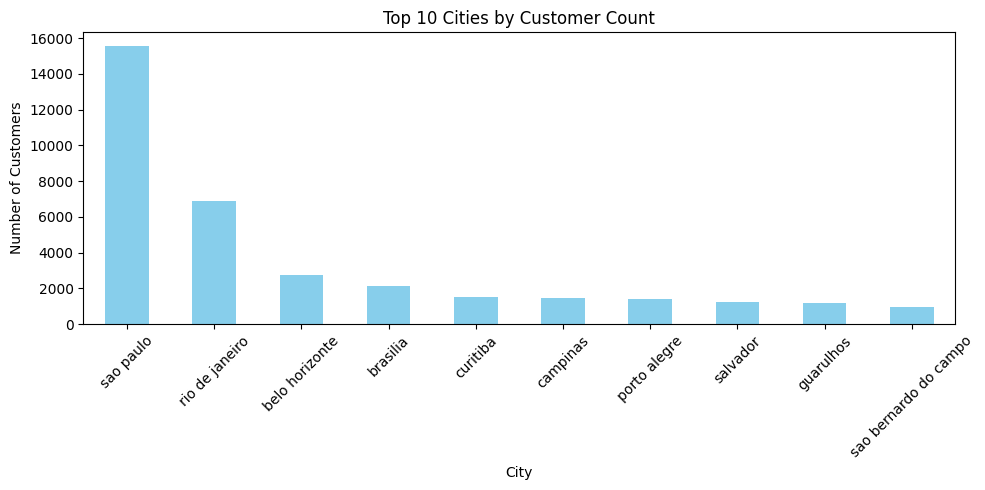

In [289]:
city_counts = customers_dataset['customer_city'].value_counts().head(10)

city_counts.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 10 Cities by Customer Count')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Al ver la grafica, podemos observar que la distribucion de clientes por ciudad es bastante 'top heavy', es decir, las ciudades grandes albergan la mayoria de clientes. En especial Sao Paulo y Rio de Janeiro

### Como ha variado la cantidad de ordenes por mes?

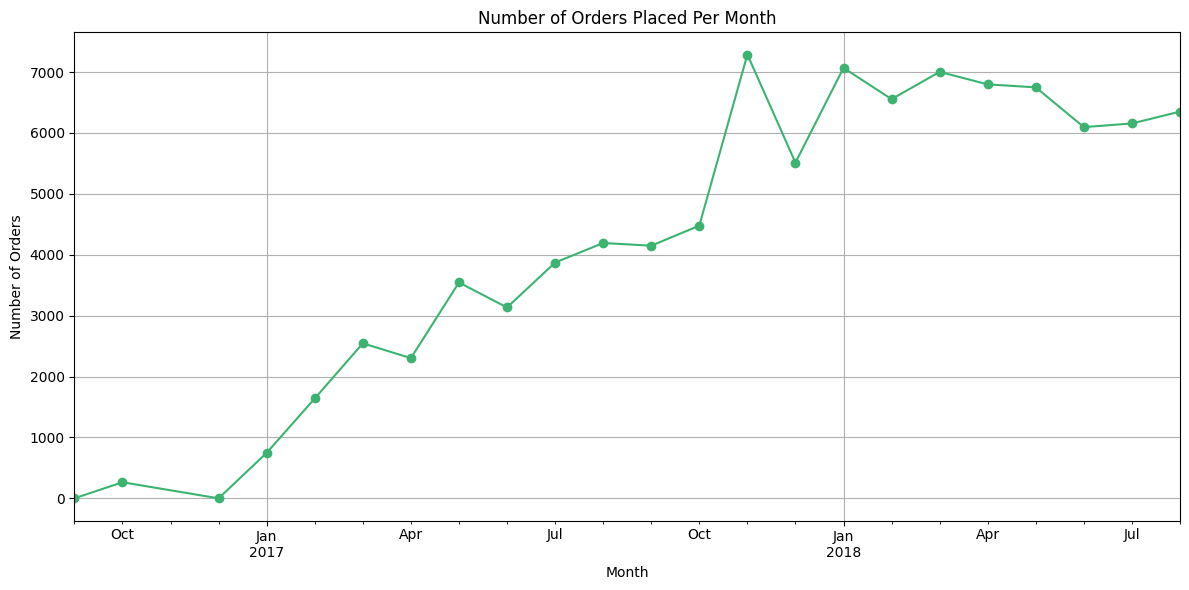

In [290]:
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])

monthly_orders = orders_dataset['order_purchase_timestamp'].dt.to_period('M').value_counts().sort_index()

monthly_orders.plot(kind='line', marker='o', figsize=(12, 6), color='mediumseagreen')
plt.title('Number of Orders Placed Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()

En la grafica podemos observar como ha cambiado la cantidad de ordenes realizadas por mes, aumentando significativamente indicando crecimiento. Esto nos indica que el crecimiento ha sucedido de manera rapida, pudiendo causar algunas faltas en la infraestructura.

### Cuales son las categorias mas populares de productos?

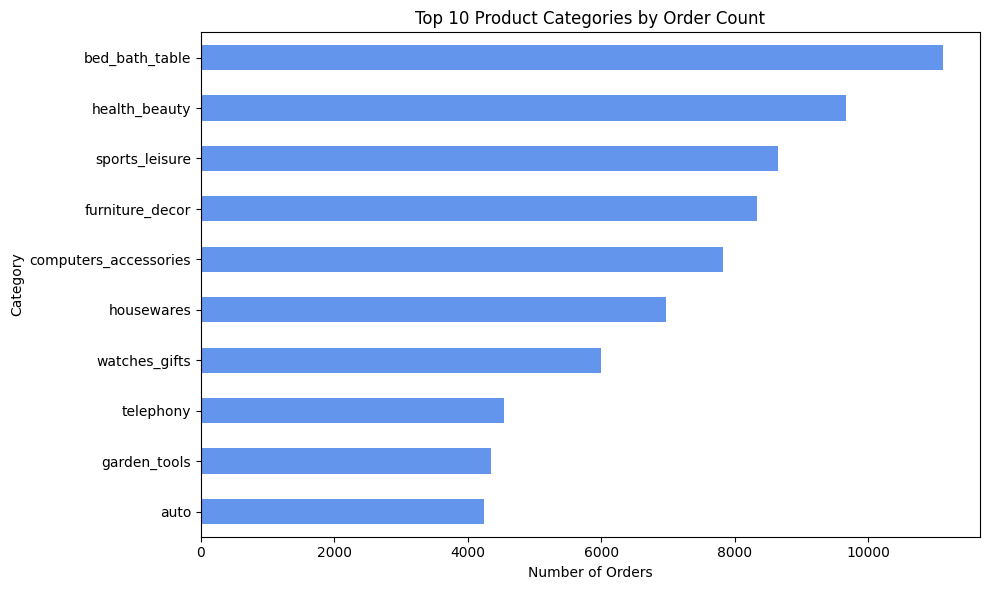

In [291]:
merged = order_items_dataset.merge(products_dataset, on='product_id')
category_counts = merged['product_category_name'].value_counts().head(10)

category_counts.plot(kind='barh', figsize=(10, 6), color='cornflowerblue')
plt.title('Top 10 Product Categories by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Category')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Entre las categorias mas populares encontramos productos de cuidado personal, deportes, muebles, accesorios de computadora etc. Esto nos da una mejor idea sobre que tipo de productos estan consumiendo los clientes de Olist

### Que porcentaje de ordenes llegan tarde?

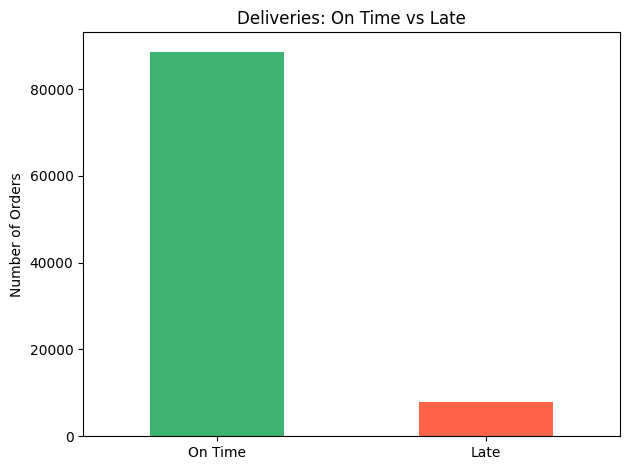

In [292]:
orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(orders_dataset['order_estimated_delivery_date'])
orders_dataset['order_delivered_customer_date'] = pd.to_datetime(orders_dataset['order_delivered_customer_date'])

delivered = orders_dataset.dropna(subset=['order_estimated_delivery_date', 'order_delivered_customer_date'])

delivered['delivery_late'] = delivered['order_delivered_customer_date'] > delivered['order_estimated_delivery_date']

on_time_counts = delivered['delivery_late'].value_counts()
on_time_counts.index = ['On Time', 'Late']

on_time_counts.plot(kind='bar', color=['mediumseagreen', 'tomato'])
plt.title('Deliveries: On Time vs Late')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


La gran mayoria de pedidos llegan a tiempo, indicando que las estimaciones realizadas son bastante precisas. Esto va acorde con un analisis estadistico de Reviews, donde la mayoria de clientes tuvieron una experiencia positiva en Olist.

### Que % del revenue viene de los vendedores mas populares?

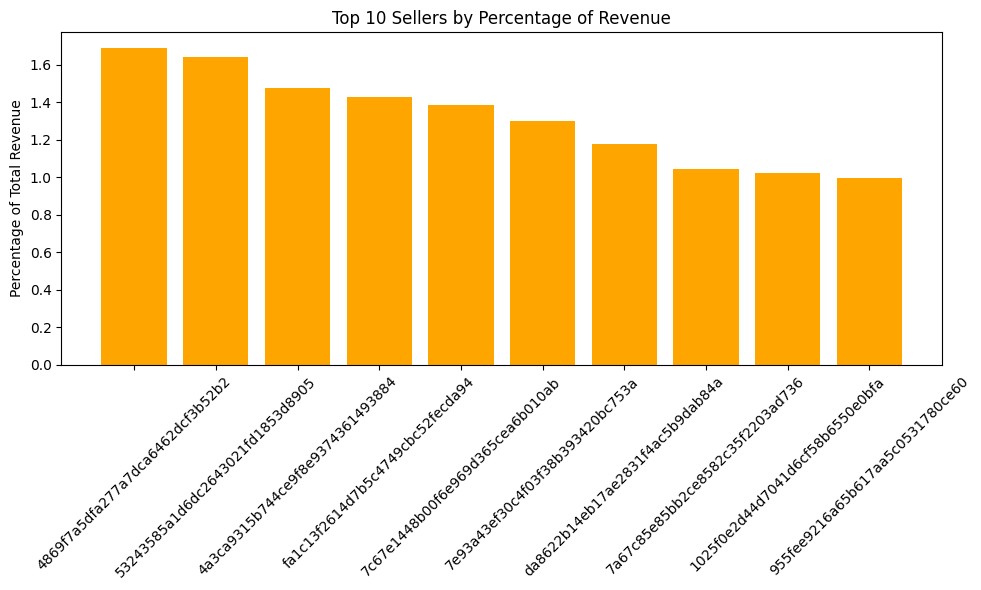

In [293]:
seller_revenue = order_items_dataset.groupby('seller_id')['price'].sum().reset_index()

total_revenue = seller_revenue['price'].sum()

seller_revenue['revenue_percentage'] = (seller_revenue['price'] / total_revenue) * 100

seller_revenue_sorted = seller_revenue.sort_values('revenue_percentage', ascending=False)

top_sellers_percentage = seller_revenue_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_sellers_percentage['seller_id'], top_sellers_percentage['revenue_percentage'], color='orange')
plt.title('Top 10 Sellers by Percentage of Revenue')
plt.ylabel('Percentage of Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Esta grafica tiene como objetivo visualizar la popularidad de los vendedores mas populares, al unicamente contar con un ID de vendedor se hizo como % del revenue total. Gracias a la grafica, nos podemos dar cuenta que los vendedores mas populares representan un monto significativo del revenue de Olist, indicando que posiblemente los clientes de Olist tengan alguna 'lealtad' hacia los vendedores con los que han comprado previamente.

### Cuanto se tardan en llegar los productos por ciudad?

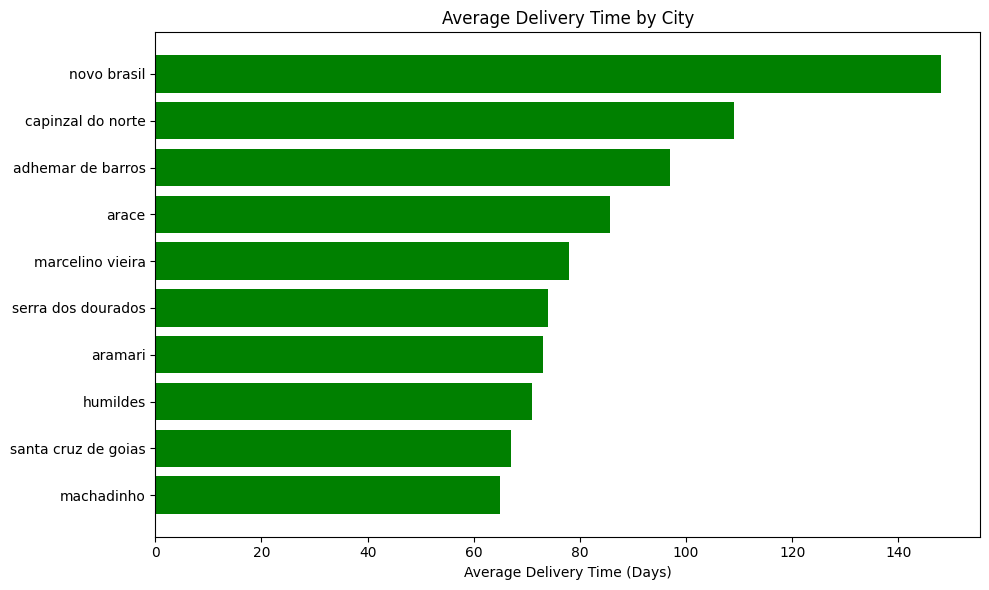

In [294]:
merged_df = pd.merge(orders_dataset, customers_dataset, on='customer_id', how='left')

merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['order_delivered_customer_date'] = pd.to_datetime(merged_df['order_delivered_customer_date'])

merged_df['delivery_time'] = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).dt.days

city_avg_delivery_time = merged_df.groupby('customer_city')['delivery_time'].mean().reset_index()

city_avg_delivery_time = city_avg_delivery_time.sort_values('delivery_time', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(city_avg_delivery_time['customer_city'], city_avg_delivery_time['delivery_time'], color='green')
plt.title('Average Delivery Time by City')
plt.xlabel('Average Delivery Time (Days)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Algunas ciudades tienen tiempos promedio de llegada sumamente altos, esto tambien se puede dar porque haya pocos pedidos (posiblemente 1 o 2 que nos esten dando datos extremos). Tambien nos indica posibles areas de mejora, donde puede ser que la ciudad tenga mucho que ver con el tiempo estimado de pedidos.

## Transformacion de Variables

Para esta seccion vamos a modificar el dataset de ordenes, esto con la finalidad de tener datos mas faciles de procesar. Vamos a agregar algunas columnas para indicar si la orden tuvo algun retraso, al igual que el tiempo que tomo el delivery en dias. De esta manera evitamos computar algunos de los valores como sucedio en la seccion anterior.

Para las ordenes, vamos a crear las siguientes variables relacionadas a la duracion y estimacion del delivery:

- Tiempo estimado de entrega en dias
- Tiempo real de entrega en dias
- Tiempo estimado - real
- Entrega atrasada (Si / No)

In [295]:
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])
orders_dataset['order_delivered_customer_date'] = pd.to_datetime(orders_dataset['order_delivered_customer_date'])
orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(orders_dataset['order_estimated_delivery_date'])

# Duracion estimada del delivery
orders_dataset['estimated_delivery_days'] = (orders_dataset['order_estimated_delivery_date'] - orders_dataset['order_purchase_timestamp']).dt.days

# Duracion real del delivery
orders_dataset['delivery_days'] = (orders_dataset['order_delivered_customer_date'] - orders_dataset['order_purchase_timestamp']).dt.days

# Delta delivery time
orders_dataset['delivery_delta'] = (orders_dataset['estimated_delivery_days'] - orders_dataset['delivery_days'])

# Entrega atrasada si / no
orders_dataset['delivery_delayed'] = (orders_dataset['delivery_delta'] < 0).astype(int)
orders_dataset.drop(columns=['order_estimated_delivery_date', 'order_status', 'order_purchase_timestamp', 'order_delivered_carrier_date', 'order_approved_at', 'order_delivered_customer_date'], inplace=True)
orders_dataset.head()

,order_id,customer_id,estimated_delivery_days,delivery_days,delivery_delta,delivery_delayed
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,15,8,7,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,19,13,6,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,26,9,17,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,26,13,13,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,12,2,10,0


Luego, vamos a agregar las siguientes variables relacionadas con los productos y precios de la orden:
- Precio promedio de los productos
- Cantidad de productos
- Precio total de los productos
- Precio del delivery
- Ratio del precio del delivery respecto al precio de los productos

In [296]:
orders_dataset.head()

,order_id,customer_id,estimated_delivery_days,delivery_days,delivery_delta,delivery_delayed
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,15,8,7,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,19,13,6,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,26,9,17,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,26,13,13,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,12,2,10,0


In [ ]:
# 1. Calculate product volume (if not already done)
products_dataset['product_volume_cm3'] = (
    products_dataset['product_length_cm'] *
    products_dataset['product_height_cm'] *
    products_dataset['product_width_cm']
)

# 2. Create product-level dataset by merging order items with product info
product_level_data = order_items_dataset.merge(
    products_dataset[[
        'product_id',
        'product_weight_g',
        'product_volume_cm3',
        'product_category_name',
        'product_description_lenght',
        'product_photos_qty',
    ]],
    on='product_id',
    how='left'
)

# 3. Add the order info you actually have
product_level_data = product_level_data.merge(
    orders_dataset[[
        'order_id',
        'customer_id',
        'estimated_delivery_days',
        'delivery_days',
        'delivery_delta',
        'delivery_delayed'
    ]],
    on='order_id',
    how='left'
)

# 4. Select final columns (customize as needed)
final_columns = [
    'order_id',
    'order_item_id',
    'product_id',
    'seller_id',          # From order_items_dataset
    'freight_value',      # From order_items_dataset
    'price',              # From order_items_dataset
    'product_weight_g',
    'product_volume_cm3',
    'product_category_name',
    'product_description_lenght',
    'product_photos_qty',
    'customer_id',
    'estimated_delivery_days',
    'delivery_days',
    'delivery_delta',
    'delivery_delayed'
]

product_level_data = product_level_data[final_columns]

# Result: Each row is one product in an order with:
# - All product dimensions
# - Seller ID and freight value (original values, not aggregated)
# - Delivery timing info
# - No order-level totals


orders_dataset = product_level_data

product_level_data.head()


,order_id,order_item_id,product_id,seller_id,freight_value,price,product_weight_g,product_volume_cm3,product_category_name,customer_id,estimated_delivery_days,delivery_days,delivery_delta,delivery_delayed
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,13.29,58.90,650.0,3528.0,cool_stuff,3ce436f183e68e07877b285a838db11a,15.0,7.0,8.0,0.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,19.93,239.90,30000.0,60000.0,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,18.0,16.0,2.0,0.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,17.87,199.00,3050.0,14157.0,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,21.0,7.0,14.0,0.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.79,12.99,200.0,2400.0,perfumery,d4eb9395c8c0431ee92fce09860c5a06,11.0,6.0,5.0,0.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,18.14,199.90,3750.0,42000.0,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,40.0,25.0,15.0,0.0


Luego, vamos a agregar informacion sobre geolocalizacion y distancias para intentar predecir el tiempo de delivery o los retrasos.

In [298]:
import pandas as pd
from geopy.distance import geodesic

geolocation_dataset = geolocation_dataset.drop_duplicates(
    subset=['geolocation_zip_code_prefix'],
    keep='first'
)

sellers_geo = sellers_dataset.merge(
    geolocation_dataset,
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how = 'left'
).rename(columns={
    'geolocation_lat': 'seller_lat',
    'geolocation_lng': 'seller_lng',
}).drop(
    columns=['geolocation_city', 'geolocation_state', 'geolocation_zip_code_prefix']
)

customers_geo = customers_dataset.merge(
    geolocation_dataset,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
).rename(columns={
    'geolocation_lat' : 'customer_lat',
    'geolocation_lng' : 'customer_lng'
}).drop(
    columns=['geolocation_city', 'geolocation_state', 'geolocation_zip_code_prefix']
)

orders_with_sellers = (
    orders_dataset.merge(
        sellers_geo[['seller_id', 'seller_lat', 'seller_lng', 'seller_state']],
        on='seller_id',
        how='left'
    )
)

orders_dataset = (
    orders_with_sellers.merge(
        customers_geo[['customer_id', 'customer_lat', 'customer_lng', 'customer_state']],
        on='customer_id',
        how='left'
    )
)

def calculate_distance(row):
    try:
        if pd.isna(row['seller_lat']) or pd.isna(row['customer_lat']):
            return np.nan
            
        seller_coords = (row['seller_lat'], row['seller_lng'])
        customer_coords = (row['customer_lat'], row['customer_lng'])
        
        return geodesic(seller_coords, customer_coords).km
    except Exception as e:
        print(f"Error calculating distance for order {row.name}: {str(e)}")
        return np.nan
    
orders_dataset['shipping_distance_km'] = orders_dataset.apply(calculate_distance, axis=1)
orders_dataset.drop(columns=['seller_lat', 'seller_lng', 'customer_lat', 'customer_lng', 'seller_id'], inplace=True)

# Variable para definir si estan en estados diferentes
orders_dataset['different_state'] = (
    orders_dataset['seller_state'] != orders_dataset['customer_state']
)

orders_dataset.head()

,order_id,order_item_id,product_id,freight_value,price,product_weight_g,product_volume_cm3,product_category_name,customer_id,estimated_delivery_days,delivery_days,delivery_delta,delivery_delayed,seller_state,customer_state,shipping_distance_km,different_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,13.29,58.90,650.0,3528.0,cool_stuff,3ce436f183e68e07877b285a838db11a,15.0,7.0,8.0,0.0,SP,RJ,301.356848,True
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,19.93,239.90,30000.0,60000.0,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,18.0,16.0,2.0,0.0,SP,SP,588.848102,False
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,17.87,199.00,3050.0,14157.0,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,21.0,7.0,14.0,0.0,MG,MG,311.645874,False
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.79,12.99,200.0,2400.0,perfumery,d4eb9395c8c0431ee92fce09860c5a06,11.0,6.0,5.0,0.0,SP,SP,300.834561,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,18.14,199.90,3750.0,42000.0,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,40.0,25.0,15.0,0.0,PR,SP,647.268094,True


Luego, agregamos informacion sobre los  metodos de pago

In [299]:
order_payments_dataset = order_payments_dataset.drop_duplicates(
    subset=['order_id'],
    keep='first'
)

orders_dataset = orders_dataset.merge(
    order_payments_dataset[['order_id', 'payment_type', 'payment_installments']],
    on='order_id',
    how='left'
)

orders_dataset['split_payments'] = (orders_dataset['payment_installments'] > 1 ).astype(int)

orders_dataset.describe()

,order_item_id,freight_value,price,product_weight_g,product_volume_cm3,estimated_delivery_days,delivery_days,delivery_delta,delivery_delayed,shipping_distance_km,payment_installments,split_payments
count,112650.000000,112650.000000,112650.000000,111046.000000,111046.000000,110173.000000,110173.000000,110173.000000,110173.000000,109637.000000,112647.000000,112650.000000
mean,1.197834,19.990320,120.653739,2099.979657,15292.793986,23.437957,12.006898,11.431058,0.073929,595.365845,3.003205,0.517834
std,0.705124,15.806405,183.633928,3754.785226,23448.839010,8.821369,9.451027,10.167992,0.261657,588.401610,2.796766,0.499684
min,1.000000,0.000000,0.850000,0.000000,168.000000,2.000000,0.000000,-189.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,13.080000,39.900000,300.000000,2856.000000,18.000000,6.000000,7.000000,0.000000,184.031356,1.000000,0.000000
50%,1.000000,16.260000,74.990000,700.000000,6578.000000,23.000000,10.000000,12.000000,0.000000,431.647485,2.000000,1.000000
75%,1.000000,21.150000,134.900000,1800.000000,18410.500000,28.000000,15.000000,17.000000,0.000000,790.453811,4.000000,1.000000
max,21.000000,409.680000,6735.000000,40425.000000,296208.000000,155.000000,209.000000,146.000000,1.000000,8711.002674,24.000000,1.000000


Por ultimo, agregamos la informacion sobre los reviews

In [300]:

orders_dataset = orders_dataset.merge(
    order_reviews_dataset[['order_id', 'review_score', 'has_title', 'has_comment']],
    on='order_id',
    how='left'
)

orders_without_reviews = orders_dataset[orders_dataset['review_score'].isna()]
print(f"Orders without reviews: {len(orders_without_reviews)}/{len(orders_dataset)}")

Orders without reviews: 942/113314


Solo hay ~700 ordenes sin reviews, para fines practicos vamos a removerlas. Esto debido a que intentar aplicar algun algorimto de clasificacion seria bastante dificil con una muestra tan dominante por ordenes con reviews. Ademas, no consideramos apropiado reemplazarlas con la media ya que el no dejar un review provee algo de informacion

In [301]:
orders_dataset = orders_dataset.dropna(subset=['review_score'])
orders_dataset.describe()

,order_item_id,freight_value,price,product_weight_g,product_volume_cm3,estimated_delivery_days,delivery_days,delivery_delta,delivery_delayed,shipping_distance_km,payment_installments,split_payments,review_score
count,112372.000000,112372.000000,112372.000000,110773.000000,110773.000000,109989.000000,109989.000000,109989.000000,109989.000000,109445.000000,112369.000000,112372.000000,112372.000000
mean,1.196010,19.977752,120.378962,2096.779143,15266.813149,23.441117,11.969579,11.471538,0.072680,594.709418,3.004352,0.517718,4.032473
std,0.691243,15.781421,182.152386,3751.465382,23381.478945,8.820326,9.362123,10.100772,0.259612,587.686749,2.798105,0.499688,1.387849
min,1.000000,0.000000,0.850000,0.000000,168.000000,2.000000,0.000000,-189.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,13.070000,39.900000,300.000000,2856.000000,18.000000,6.000000,7.000000,0.000000,184.090132,1.000000,0.000000,4.000000
50%,1.000000,16.250000,74.900000,700.000000,6555.000000,23.000000,10.000000,12.000000,0.000000,431.426323,2.000000,1.000000,5.000000
75%,1.000000,21.150000,134.900000,1800.000000,18375.000000,28.000000,15.000000,17.000000,0.000000,789.412663,4.000000,1.000000,5.000000
max,21.000000,409.680000,6735.000000,40425.000000,296208.000000,155.000000,208.000000,146.000000,1.000000,8711.002674,24.000000,1.000000,5.000000


Ya con esto, podemos proceder a remover las variables de ID y encodear

In [302]:
orders_dataset.drop(columns=['order_id', 'customer_id', 'product_id'], inplace=True)
orders_dataset.head(20)

,order_item_id,freight_value,price,product_weight_g,product_volume_cm3,product_category_name,estimated_delivery_days,delivery_days,delivery_delta,delivery_delayed,seller_state,customer_state,shipping_distance_km,different_state,payment_type,payment_installments,split_payments,review_score,has_title,has_comment
0,1,13.29,58.90,650.0,3528.0,cool_stuff,15.0,7.0,8.0,0.0,SP,RJ,301.356848,True,credit_card,2.0,1,5.0,False,True
1,1,19.93,239.90,30000.0,60000.0,pet_shop,18.0,16.0,2.0,0.0,SP,SP,588.848102,False,credit_card,3.0,1,4.0,False,False
2,1,17.87,199.00,3050.0,14157.0,furniture_decor,21.0,7.0,14.0,0.0,MG,MG,311.645874,False,credit_card,5.0,1,5.0,False,True
3,1,12.79,12.99,200.0,2400.0,perfumery,11.0,6.0,5.0,0.0,SP,SP,300.834561,False,credit_card,2.0,1,4.0,False,False
4,1,18.14,199.90,3750.0,42000.0,garden_tools,40.0,25.0,15.0,0.0,PR,SP,647.268094,True,credit_card,3.0,1,5.0,False,True
5,1,12.69,21.90,450.0,2880.0,housewares,21.0,6.0,15.0,0.0,SP,MG,160.900121,True,boleto,1.0,0,4.0,False,False
6,1,11.85,19.90,200.0,2700.0,telephony,24.0,8.0,16.0,0.0,SP,SP,484.141944,False,credit_card,1.0,0,4.0,False,False
7,1,70.75,810.00,13805.0,118125.0,garden_tools,20.0,5.0,15.0,0.0,SP,SP,547.907170,False,credit_card,10.0,1,5.0,False,False
8,1,11.65,145.95,2000.0,5760.0,health_beauty,9.0,9.0,0.0,0.0,SP,SP,52.285149,False,credit_card,3.0,1,1.0,False,True
9,1,11.40,53.99,850.0,1827.0,books_technical,20.0,2.0,18.0,0.0,SP,SP,33.198632,False,credit_card,1.0,0,4.0,False,False


## Procesamiento Post-Merge

En esta seccion, vamos a realizar algunas transformaciones adicionales a nuestro dataset. Estas transformaciones y visualizaciones se pueden realizar de manera mas eficiente al tener todo nuestro set de datos unificado

Primero, podemos tener la informacion recopilada sobre las dimensiones, peso, etc. de los productos dentro de una sola variable.

In [303]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
orders_dataset = orders_dataset.dropna(subset=['payment_type'])

encoded = ohe.fit_transform(orders_dataset[['seller_state', 'customer_state', 'payment_type']])

encoded_df = pd.DataFrame(
    encoded,
    columns=ohe.get_feature_names_out(),
    index=orders_dataset.index
)

encoded_df.columns = encoded_df.columns.str.replace('x0_', 'seller_').str.replace('x1_', 'customer_').str.replace('x2_', 'payment_')

orders_dataset = pd.concat([orders_dataset, encoded_df], axis=1)

orders_dataset.drop(columns=['customer_state', 'seller_state', 'payment_type'], inplace=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
display(orders_dataset.head(20))

,order_item_id,freight_value,price,product_weight_g,product_volume_cm3,product_category_name,estimated_delivery_days,delivery_days,delivery_delta,delivery_delayed,shipping_distance_km,different_state,payment_installments,split_payments,review_score,has_title,has_comment,seller_state_AC,seller_state_AM,seller_state_BA,seller_state_CE,seller_state_DF,seller_state_ES,seller_state_GO,seller_state_MA,seller_state_MG,seller_state_MS,seller_state_MT,seller_state_PA,seller_state_PB,seller_state_PE,seller_state_PI,seller_state_PR,seller_state_RJ,seller_state_RN,seller_state_RO,seller_state_RS,seller_state_SC,seller_state_SE,seller_state_SP,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MA,customer_state_MG,customer_state_MS,customer_state_MT,customer_state_PA,customer_state_PB,customer_state_PE,customer_state_PI,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,customer_state_nan,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,1,13.29,58.90,650.0,3528.0,cool_stuff,15.0,7.0,8.0,0.0,301.356848,True,2.0,1,5.0,False,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,19.93,239.90,30000.0,60000.0,pet_shop,18.0,16.0,2.0,0.0,588.848102,False,3.0,1,4.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,17.87,199.00,3050.0,14157.0,furniture_decor,21.0,7.0,14.0,0.0,311.645874,False,5.0,1,5.0,False,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,12.79,12.99,200.0,2400.0,perfumery,11.0,6.0,5.0,0.0,300.834561,False,2.0,1,4.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,18.14,199.90,3750.0,42000.0,garden_tools,40.0,25.0,15.0,0.0,647.268094,True,3.0,1,5.0,False,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1,12.69,21.90,450.0,2880.0,housewares,21.0,6.0,15.0,0.0,160.900121,True,1.0,0,4.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1,11.85,19.90,200.0,2700.0,telephony,24.0,8.0,16.0,0.0,484.141944,False,1.0,0,4.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,1,70.75,810.00,13805.0,118125.0,garden_tools,20.0,5.0,15.0,0.0,547.907170,False,10.0,1,5.0,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,1,11.65,145.95,2000.0,5760.0,health_beauty,9.0,9.0,0.0,0.0,52.285149,False,3.0,1,1.0,False,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [304]:
Q1 = orders_dataset['delivery_days'].quantile(0.25)
Q3 = orders_dataset['delivery_days'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

orders_dataset = orders_dataset[(orders_dataset['delivery_days'] >= lower) & (orders_dataset['delivery_days'] <= upper)]

## Análisis de correlación de características

Para esta seccion vamos a realizar algunos joins de los DF's, no lo realizamos anteriormente ya que teniamos pendientes transformaciones u algunas otras modificaciones que resultaban mejor hacerlas de manera individual de cada DF.

### Rating
Primero, vamos a evaluar ciertas caracteristicas que se pueden relacionar con el rating de los productos. Estas pueden ser
- Cantidad de items en la compra
- Valor de la compra
- Tiempo de delivery
- Ciudad del cliente

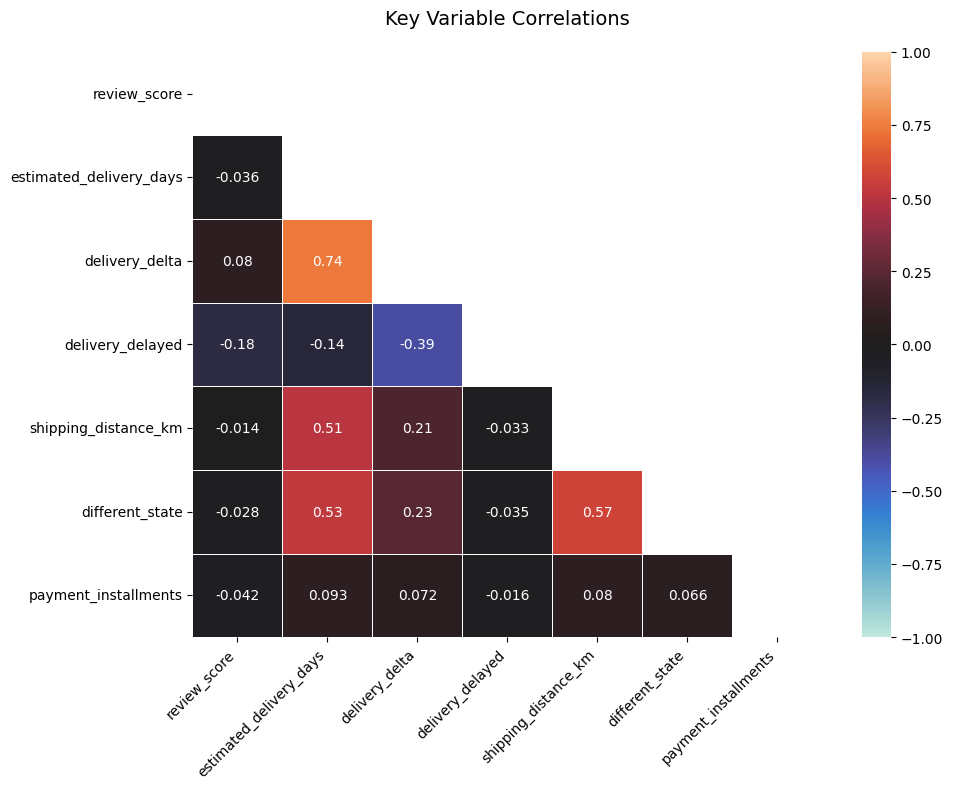

In [305]:
focus_cols = [
    'review_score', 'estimated_delivery_days', 'delivery_delta', 'delivery_delayed',
    'avg_product_price', 'total_order_price', 'order_freight_value', 'freight_to_price',
    'average_product_volume_cm3', 'average_product_weight_g',
    'shipping_distance_km', 'different_state', 'payment_installments', 'product_size_factor'
]

# Filter to only columns that actually exist
valid_cols = [col for col in focus_cols if col in orders_dataset.columns]

plt.figure(figsize=(10, 8))

# Create mask to hide upper triangle (optional)
mask = np.triu(np.ones_like(orders_dataset[valid_cols].corr()))

sns.heatmap(
    orders_dataset[valid_cols].corr(),
    annot=True,
    cmap='icefire',
    vmin=-1, 
    vmax=1,
    mask=mask,
    linewidths=0.5,
    annot_kws={"size": 10}
)

plt.title("Key Variable Correlations", pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [306]:
# Assuming 'orders_dataset' is your DataFrame
count_delayed = orders_dataset['delivery_delayed'].sum()

print(f"Number of deliveries delayed (value 1): {count_delayed}")

Number of deliveries delayed (value 1): 3797.0


In [307]:
orders_dataset.drop(columns=['has_comment', 'has_title', 'order_item_id'], inplace=True)
print(orders_dataset.head(10))
orders_dataset.to_csv('dataset/cleaned_orders.csv', index=False)

   freight_value   price  product_weight_g  product_volume_cm3 product_category_name  estimated_delivery_days  delivery_days  delivery_delta  delivery_delayed  shipping_distance_km  different_state  payment_installments  split_payments  review_score  seller_state_AC  seller_state_AM  seller_state_BA  seller_state_CE  seller_state_DF  seller_state_ES  seller_state_GO  seller_state_MA  seller_state_MG  seller_state_MS  seller_state_MT  seller_state_PA  seller_state_PB  seller_state_PE  seller_state_PI  seller_state_PR  seller_state_RJ  seller_state_RN  seller_state_RO  seller_state_RS  seller_state_SC  seller_state_SE  seller_state_SP  customer_state_AC  customer_state_AL  customer_state_AM  customer_state_AP  customer_state_BA  customer_state_CE  customer_state_DF  customer_state_ES  customer_state_GO  customer_state_MA  customer_state_MG  customer_state_MS  customer_state_MT  customer_state_PA  customer_state_PB  customer_state_PE  customer_state_PI  customer_state_PR  \
0          13.